# Python Hackathon Questions 31 to 40

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Patients =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Patients")
EDVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDVisits")
AmbulatoryVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "AmbulatoryVisits")
ReAdmissionRegistry =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "ReAdmissionRegistry")
Discharges =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Discharges")
Providers =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Providers")
EDUnique = pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDUnique")

# Q31: Find the count of White Spanish Male.

In [4]:
RaceWhiteGenderMaleLanguageSpanish=(Patients['Race'].str.contains('White'))& (Patients['Gender'].str.contains('Male'))& (Patients['Language'].str.contains('Spanish'))
len(Patients[RaceWhiteGenderMaleLanguageSpanish])

15

# Q32: If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [8]:
Patients['FullName']=(Patients['Gender'].str.replace('Male','Mr.').str.replace('Female','Ms.') + ' '+ Patients['FirstName']+ ' ' +Patients['LastName'])
#Patients.head(30)

## Q33: Using a bar chart, which Service had the lowest count of Expected Mortality?

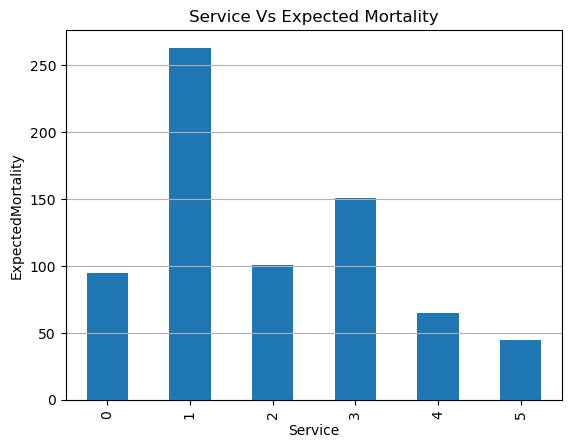

In [24]:
import numpy as np
import matplotlib.pyplot as plt
ReAdminService = pd.DataFrame(ReAdmissionRegistry, columns=['Service', 'ExpectedMortality'])
ReAdminServiceGroup = ReAdminService.groupby(['Service'],as_index=False)['ExpectedMortality'].count()
ReAdminServiceGroup.head(10)
ServiceExpMortalityPlot= ReAdminServiceGroup["ExpectedMortality"].plot(kind="bar")
plt.xlabel("Service")
plt.ylabel("ExpectedMortality")
plt.title("Service Vs Expected Mortality")
plt.grid(axis='y')

# Q34:  np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [15]:
arr=np.arange(1,31).reshape(6,5)
#print(arr)
arr1=arr[2,0:2]
arr2=arr[3,0:2]
Newarr=np.hstack((arr1,arr2))
print(Newarr)

[11 12 16 17]


In [ ]:
#New Question1... arrange above as 2D 
arr=np.arange(1,31).reshape(6,5)
arr1=arr[2,0:2]
arr2=arr[3,0:2]
Newarr=np.vstack((arr1,arr2))
print(Newarr)

In [ ]:
#New question 2: with axis=1
arr=np.arange(1,31).reshape(6,5)
arr1=arr[2,0:2]
arr2=arr[3,0:2]
Newarr=np.stack((arr1,arr2), axis=1)
print(Newarr)

# 35: np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

In [16]:
arr=np.arange(1,31).reshape(6,5)
Elements=(arr[0,1], arr[1,2], arr[2,3], arr[3,4])
print(Elements)

(2, 8, 14, 20)


# 36: Create a correlation matrix on EDVisits

In [11]:
# EDVisits.head()
matrix = EDVisits.corr()
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


<AxesSubplot:>

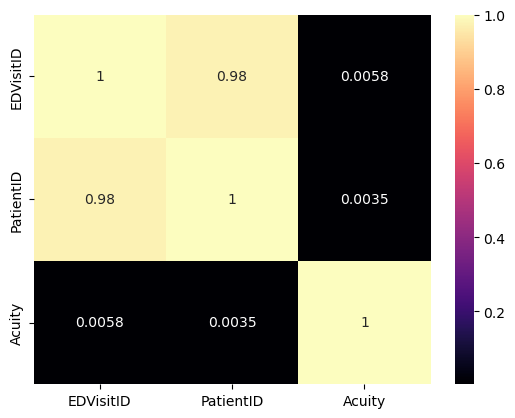

In [14]:
import seaborn as sns
EDmatrix = EDVisits.corr()
sns.heatmap(EDmatrix, annot=True, cmap='magma')

# 37: Write a function to print all the upper case letter of a given sentence.

In [17]:
UpperString = input('Enter any string: ')

upper = ''
for char in UpperString:
    if char.isupper():
        upper += char

print('Uppercase characters:', upper)

Enter any string: WElcome Home
Uppercase characters: WEH


# 38: Number of patients on 'Transfer' based on primary diagnosis

In [10]:
PrimaryDiagnosisTransfer = ReAdmissionRegistry[(ReAdmissionRegistry['DischargeDisposition'].str.contains('Transfer'))]
PrimaryDiagnosisTransfer.head()
PrimaryDiagnosisTransferGroup = PrimaryDiagnosisTransfer.groupby(['PrimaryDiagnosis'],as_index=False)['DischargeDisposition'].count()
PrimaryDiagnosisTransferGroup.head(20)


,PrimaryDiagnosis,DischargeDisposition
0,Afib,1
1,Diabetes,7
2,Flu,2
3,Heart Failure,9
4,Knee Replacement,1
5,Laceration,1
6,Pain,1
7,Pneumonia,8
8,Stroke,9


# 39: Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.


In [21]:
Patients.head()
df_patients=pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Patients")
df_edunique= pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDUnique")
df=pd.merge(df_patients, df_edunique, on='PatientID')
df= df[df['ReasonForVisit']=='Migraine'][['FirstName', 'LastName', 'DateOfBirth']]
print(df)


    FirstName  LastName             DateOfBirth
1         Far     Myers 1985-11-15 02:08:42.090
2     Devlin    Michael 1976-04-15 02:52:09.762
11     Zonnya        Ab 1963-05-23 10:04:33.074
13        Gan        Yu 1970-06-02 06:22:54.675
21     Joesph      Long 1979-12-04 16:45:56.080
..        ...       ...                     ...
896   Barrows  Coupland 1979-10-31 18:28:35.483
907      Knox     Group 1975-08-25 22:27:50.177
909   Kuvalis  Coupland 1986-05-23 19:23:27.752
914  Jerrilyn     Dyson 1978-01-18 02:41:55.178
923    Daniel  Shakesby 1980-11-28 17:57:03.702

[116 rows x 3 columns]


# 40: Plot a graph showing the count of patients for the reason visited the hospital

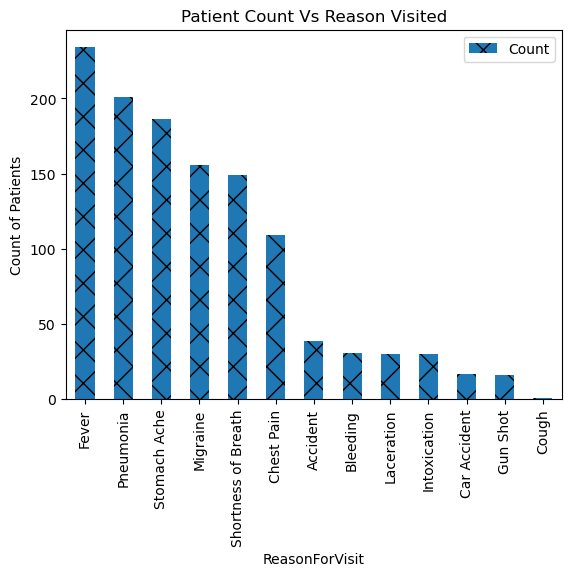

In [4]:
df = pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDVisits")
reason_counts = df['ReasonForVisit'].value_counts().reset_index()
reason_counts.columns = ['ReasonForVisit', 'Count']

reason_counts= reason_counts.sort_values(by='Count', ascending=False)
reason_counts.plot.bar(x='ReasonForVisit', y='Count', hatch='x')
plt.ylabel('Count of Patients')
plt.title('Patient Count Vs Reason Visited')
plt.show()